In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [4]:
df = pd.read_csv('mega_global.csv')

In [6]:
print(df.shape)
df.head()

(194, 12)


,Username,Followers,Average Likes,Average Comments,Average Engagement Rate,Engagement Rate (60 Days),Posting frequency (last 60 days),Posts (image),Posts (videos),Posts (carousel),Average Hashtags / Post (60 Days),Hashtags (dictionary)
0,cristiano,465027234,8671952.69,51758.33,1.8760,1.5903,31,6,6,19,0.323,"{'bioniq': 1, 'cr7': 2, 'peakperformance': 1, ..."
1,kyliejenner,356687629,8296735.66,47534.12,2.3394,1.6189,45,3,11,31,0.044,"{'allurebestofbeauty': 1, 'bestofbeauty': 1}"
2,leomessi,347032978,6895177.81,47044.54,2.0005,1.9045,27,2,12,13,0.704,"{'mlsseasonpass': 2, 'messikids': 1, 'jointhef..."
3,selenagomez,334551681,6252711.42,39167.12,1.8807,0.7720,21,2,4,15,0.333,"{'louderthesoundtrackofchange': 2, 'streamonma..."
4,therock,327064138,1874150.50,8529.75,0.5756,0.3723,60,6,50,4,1.067,"{'cheehoo': 2, 'redonemovie': 4, 'ifyasmell': ..."


In [7]:
df.dtypes

Username                              object
Followers                              int64
Average Likes                        float64
Average Comments                     float64
Average Engagement Rate              float64
Engagement Rate (60 Days)            float64
Posting frequency (last 60 days)       int64
Posts (image)                          int64
Posts (videos)                         int64
Posts (carousel)                       int64
Average Hashtags / Post (60 Days)    float64
Hashtags (dictionary)                 object
dtype: object

In [8]:
print(df.isnull().sum())

Username                             0
Followers                            0
Average Likes                        0
Average Comments                     0
Average Engagement Rate              0
Engagement Rate (60 Days)            0
Posting frequency (last 60 days)     0
Posts (image)                        0
Posts (videos)                       0
Posts (carousel)                     0
Average Hashtags / Post (60 Days)    0
Hashtags (dictionary)                0
dtype: int64


In [10]:
df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)

In [11]:
# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Columns:", numeric_columns)

# Non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-Numeric Columns:", non_numeric_columns)

Numeric Columns: Index(['Followers', 'Average_Likes', 'Average_Comments',
       'Average_Engagement_Rate', 'Engagement_Rate_(60_Days)',
       'Posting_frequency_(last_60_days)', 'Posts_(image)', 'Posts_(videos)',
       'Posts_(carousel)', 'Average_Hashtags_/_Post_(60_Days)'],
      dtype='object')
Non-Numeric Columns: Index(['Username', 'Hashtags_(dictionary)'], dtype='object')


In [12]:
# Loop through numeric columns and calculate outliers using IQR
for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}':")
    print(outliers[['Username', col]])  # Print relevant columns for context
    print("-------")

Outliers in 'Followers':
              Username  Followers
0            cristiano  465027234
1          kyliejenner  356687629
2             leomessi  347032978
3          selenagomez  334551681
4              therock  327064138
5        kimkardashian  323090977
6         arianagrande  321374794
7              beyonce  267023539
8      khloekardashian  260359924
9        kendalljenner  247599374
10        justinbieber  247448517
11              natgeo  232020700
12                nike  228524022
13         taylorswift  218097325
14                 jlo  217547805
15         virat.kohli  206743723
16          nickiminaj  197697257
17     kourtneykardash  188868254
18          mileycyrus  178122866
19            neymarjr  176162107
20           katyperry  167005817
21      kevinhart4real  148755284
22             zendaya  147816903
23           iamcardib  137199449
24            ddlovato  136695965
25          badgalriri  133436105
26           kingjames  127326148
27        theellenshow 

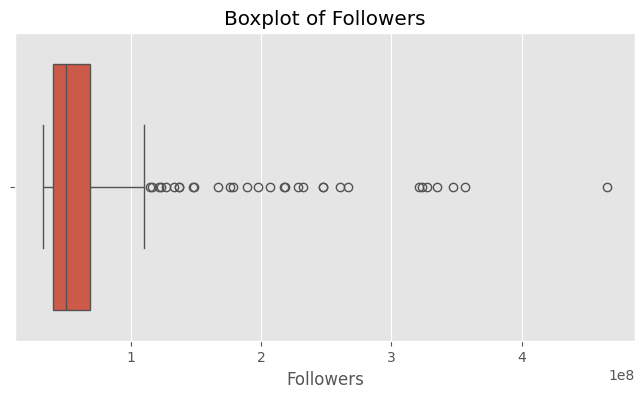

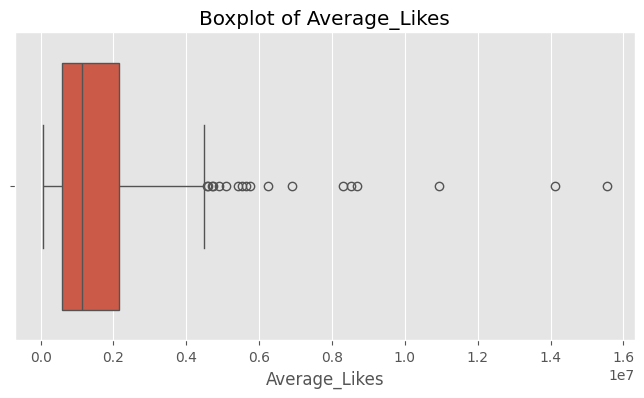

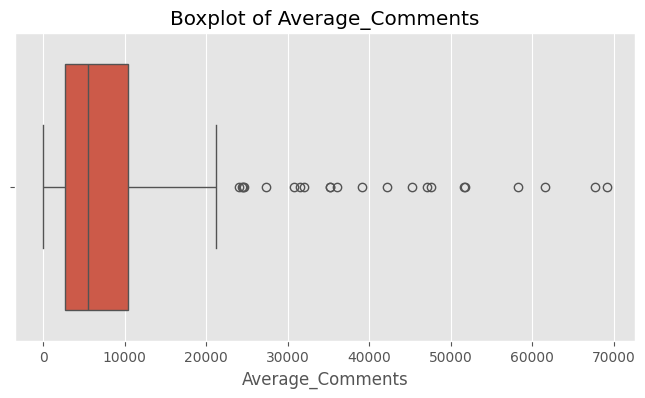

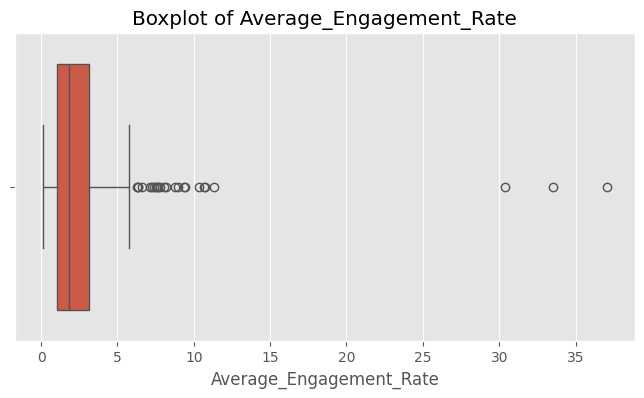

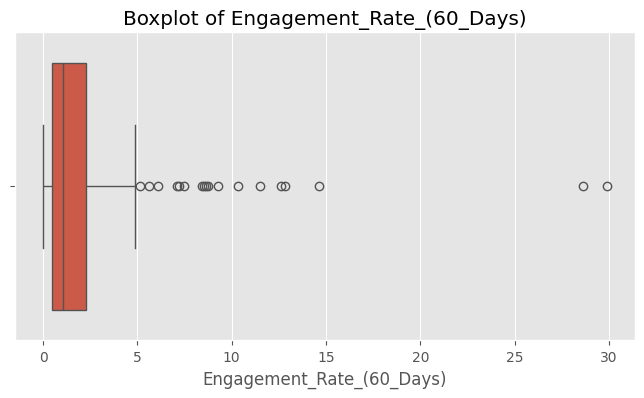

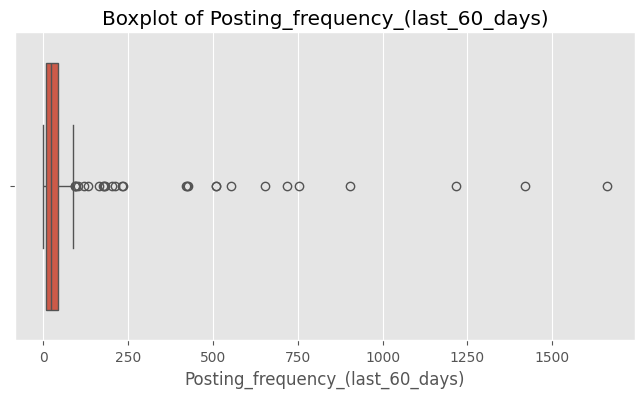

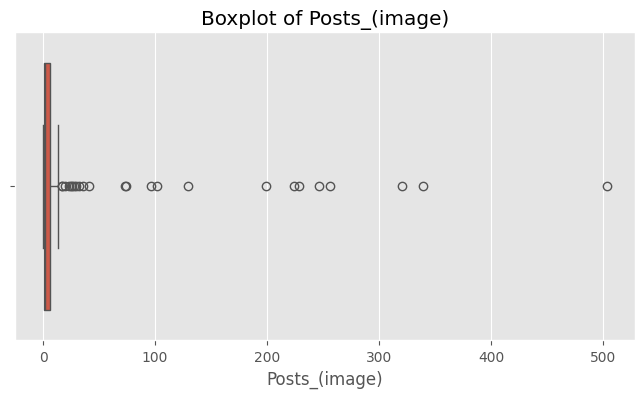

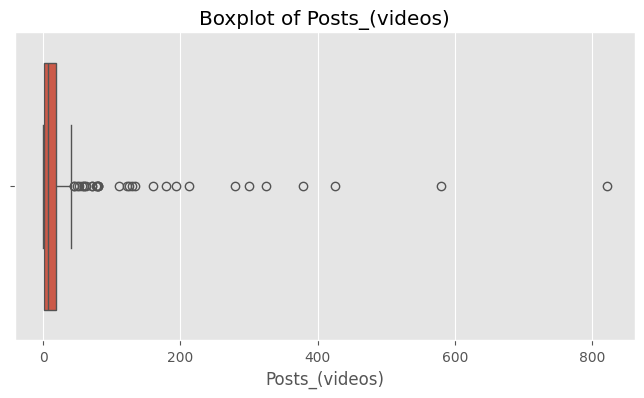

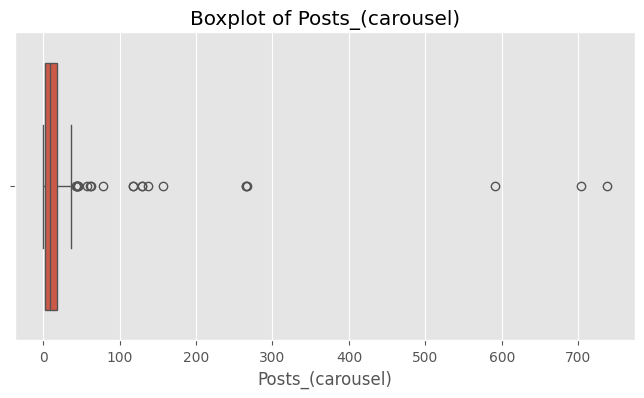

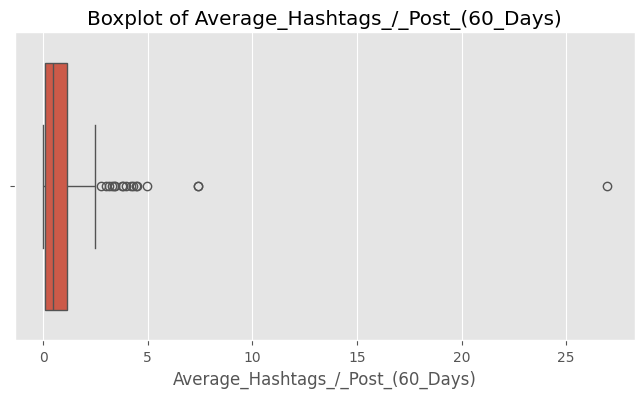

In [13]:
# Boxplots for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# Convert the 'Hashtags_(dictionary)' column to actual dictionaries
df['Hashtags_(dictionary)'] = df['Hashtags_(dictionary)'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

<bound method NDFrame.head of          Username  Followers  Average_Likes  Average_Comments  \
0       cristiano  465027234     8671952.69          51758.33   
1     kyliejenner  356687629     8296735.66          47534.12   
2        leomessi  347032978     6895177.81          47044.54   
3     selenagomez  334551681     6252711.42          39167.12   
4         therock  327064138     1874150.50           8529.75   
..            ...        ...            ...               ...   
189   luansantana   33024460      205587.96           4795.10   
190  danbilzerian   32938902     2044189.00          24680.81   
191     nickjonas   32906383      744225.67           2191.08   
192  gururandhawa   32845959      637758.25           3837.25   
193     iambeckyg   32812027      625421.48           1588.42   

     Average_Engagement_Rate  Engagement_Rate_(60_Days)  \
0                     1.8760                     1.5903   
1                     2.3394                     1.6189   
2           

In [34]:
df.info


<bound method DataFrame.info of      Followers  Average_Likes  Average_Comments  Average_Engagement_Rate  \
0    465027234     8671952.69          51758.33                   1.8760   
1    356687629     8296735.66          47534.12                   2.3394   
2    347032978     6895177.81          47044.54                   2.0005   
3    334551681     6252711.42          39167.12                   1.8807   
4    327064138     1874150.50           8529.75                   0.5756   
..         ...            ...               ...                      ...   
189   33024460      205587.96           4795.10                   0.6371   
190   32938902     2044189.00          24680.81                   6.2809   
191   32906383      744225.67           2191.08                   2.2683   
192   32845959      637758.25           3837.25                   1.9533   
193   32812027      625421.48           1588.42                   1.9109   

     Engagement_Rate_(60_Days)  Posting_frequency_(last

In [33]:

df = df.drop(columns=['Username'])

In [26]:
df.info

<bound method DataFrame.info of          Username  Followers  Average_Likes  Average_Comments  \
0       cristiano  465027234     8671952.69          51758.33   
1     kyliejenner  356687629     8296735.66          47534.12   
2        leomessi  347032978     6895177.81          47044.54   
3     selenagomez  334551681     6252711.42          39167.12   
4         therock  327064138     1874150.50           8529.75   
..            ...        ...            ...               ...   
189   luansantana   33024460      205587.96           4795.10   
190  danbilzerian   32938902     2044189.00          24680.81   
191     nickjonas   32906383      744225.67           2191.08   
192  gururandhawa   32845959      637758.25           3837.25   
193     iambeckyg   32812027      625421.48           1588.42   

     Average_Engagement_Rate  Engagement_Rate_(60_Days)  \
0                     1.8760                     1.5903   
1                     2.3394                     1.6189   
2         

In [35]:
df.isnull().sum()


Followers                            0
Average_Likes                        0
Average_Comments                     0
Average_Engagement_Rate              0
Engagement_Rate_(60_Days)            0
Posting_frequency_(last_60_days)     0
Posts_(image)                        0
Posts_(videos)                       0
Posts_(carousel)                     0
Average_Hashtags_/_Post_(60_Days)    0
dtype: int64

In [37]:
df.to_csv('mega_global_cleaned.csv', index=False)
